   Classe distance gare-gare  Pourcentage
9             Moins de 25 km    13.478261
3                 25 à 50 km    19.704545
7                 50 à 75 km    10.600000
8                75 à 100 km     7.326087
0               100 à 150 km    11.400000
1               150 à 200 km     6.826087
2               200 à 250 km     4.681818
4               250 à 300 km     6.911111
5               300 à 400 km     8.090909
6               400 à 500 km     5.021739
10            Plus de 500 km    10.152174


/Users/pruvost/ETUDE_SNCF_DISTANCE_PARCOURUE.pdf

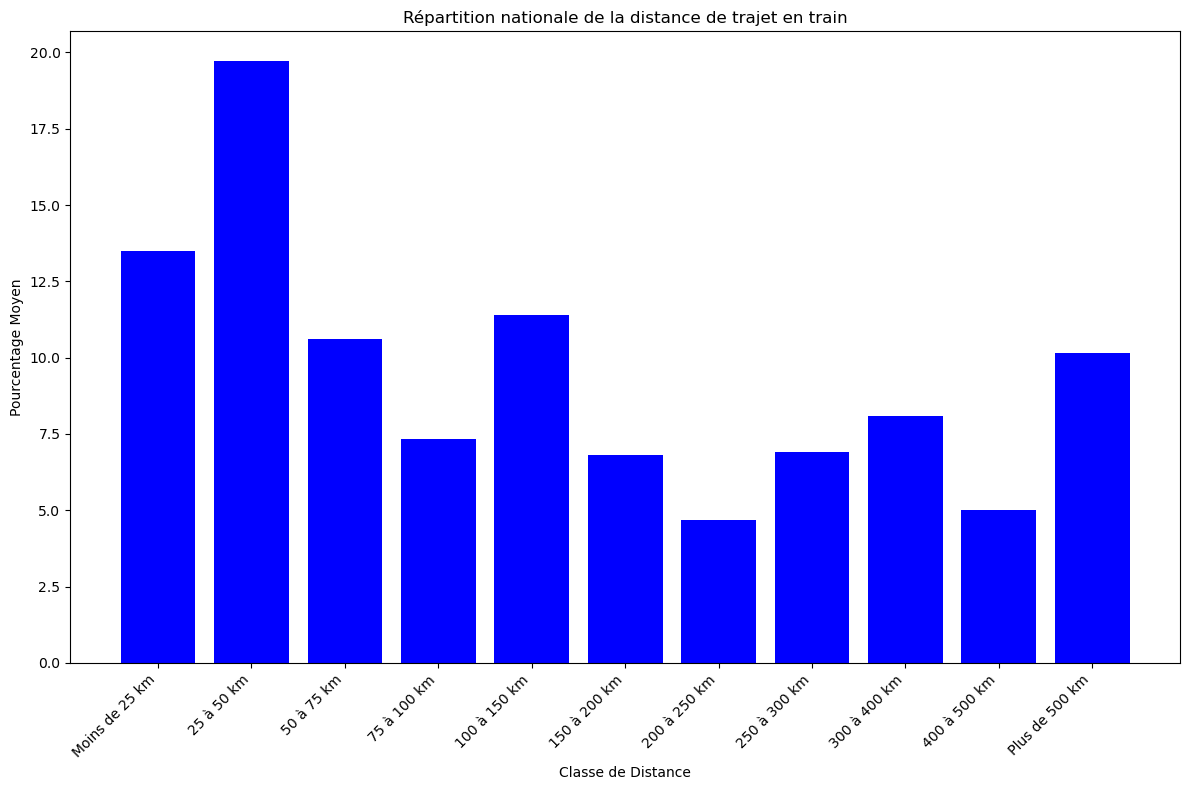

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'distance-parcourue.csv'
data = pd.read_csv(file_path, delimiter=';')  


data.columns = ['UIC', 'Gare enquêtée', 'Classe distance gare-gare', 'Pourcentage', 'Année']


data['Pourcentage'] = pd.to_numeric(data['Pourcentage'], errors='coerce')
data['Année'] = pd.to_numeric(data['Année'], errors='coerce')


mean_percentage_by_distance = data.groupby('Classe distance gare-gare')['Pourcentage'].mean().reset_index()


distance_order = ['Moins de 25 km', '25 à 50 km', '50 à 75 km', '75 à 100 km', '100 à 150 km', '150 à 200 km', '200 à 250 km', '250 à 300 km', '300 à 400 km', '400 à 500 km', 'Plus de 500 km']
mean_percentage_by_distance['Classe distance gare-gare'] = pd.Categorical(mean_percentage_by_distance['Classe distance gare-gare'], categories=distance_order, ordered=True)


mean_percentage_by_distance = mean_percentage_by_distance.sort_values('Classe distance gare-gare')


print(mean_percentage_by_distance)


plt.figure(figsize=(12, 8)) 
plt.bar(mean_percentage_by_distance['Classe distance gare-gare'], mean_percentage_by_distance['Pourcentage'], color='blue')
plt.xlabel('Classe de Distance')
plt.ylabel('Pourcentage Moyen')  
plt.title('Répartition nationale de la distance de trajet en train') 
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 


plt.savefig('ETUDE_SNCF_DISTANCE_PARCOURUE.pdf')
from IPython.display import FileLink

display(FileLink('ETUDE_SNCF_DISTANCE_PARCOURUE.pdf'))
plt.show() 
